# Project Name: Traffic Sign Detection

# Project ID: PRAICP-1002-TrafSignDetc


## Importing libraries


In [1]:
# importing necessary Libraries
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from keras.utils import to_categorical
import matplotlib.pyplot as plt
import tensorflow as tf
from PIL import Image
import numpy as np
import pandas as pd
import cv2
import os

In [2]:
# Reading the input images and putting them into a numpy array
data = []
labels = []

height = 30
width = 30
channels = 3
classes = 42
n_inputs = height * width * channels

## Checking the Images in Metadata


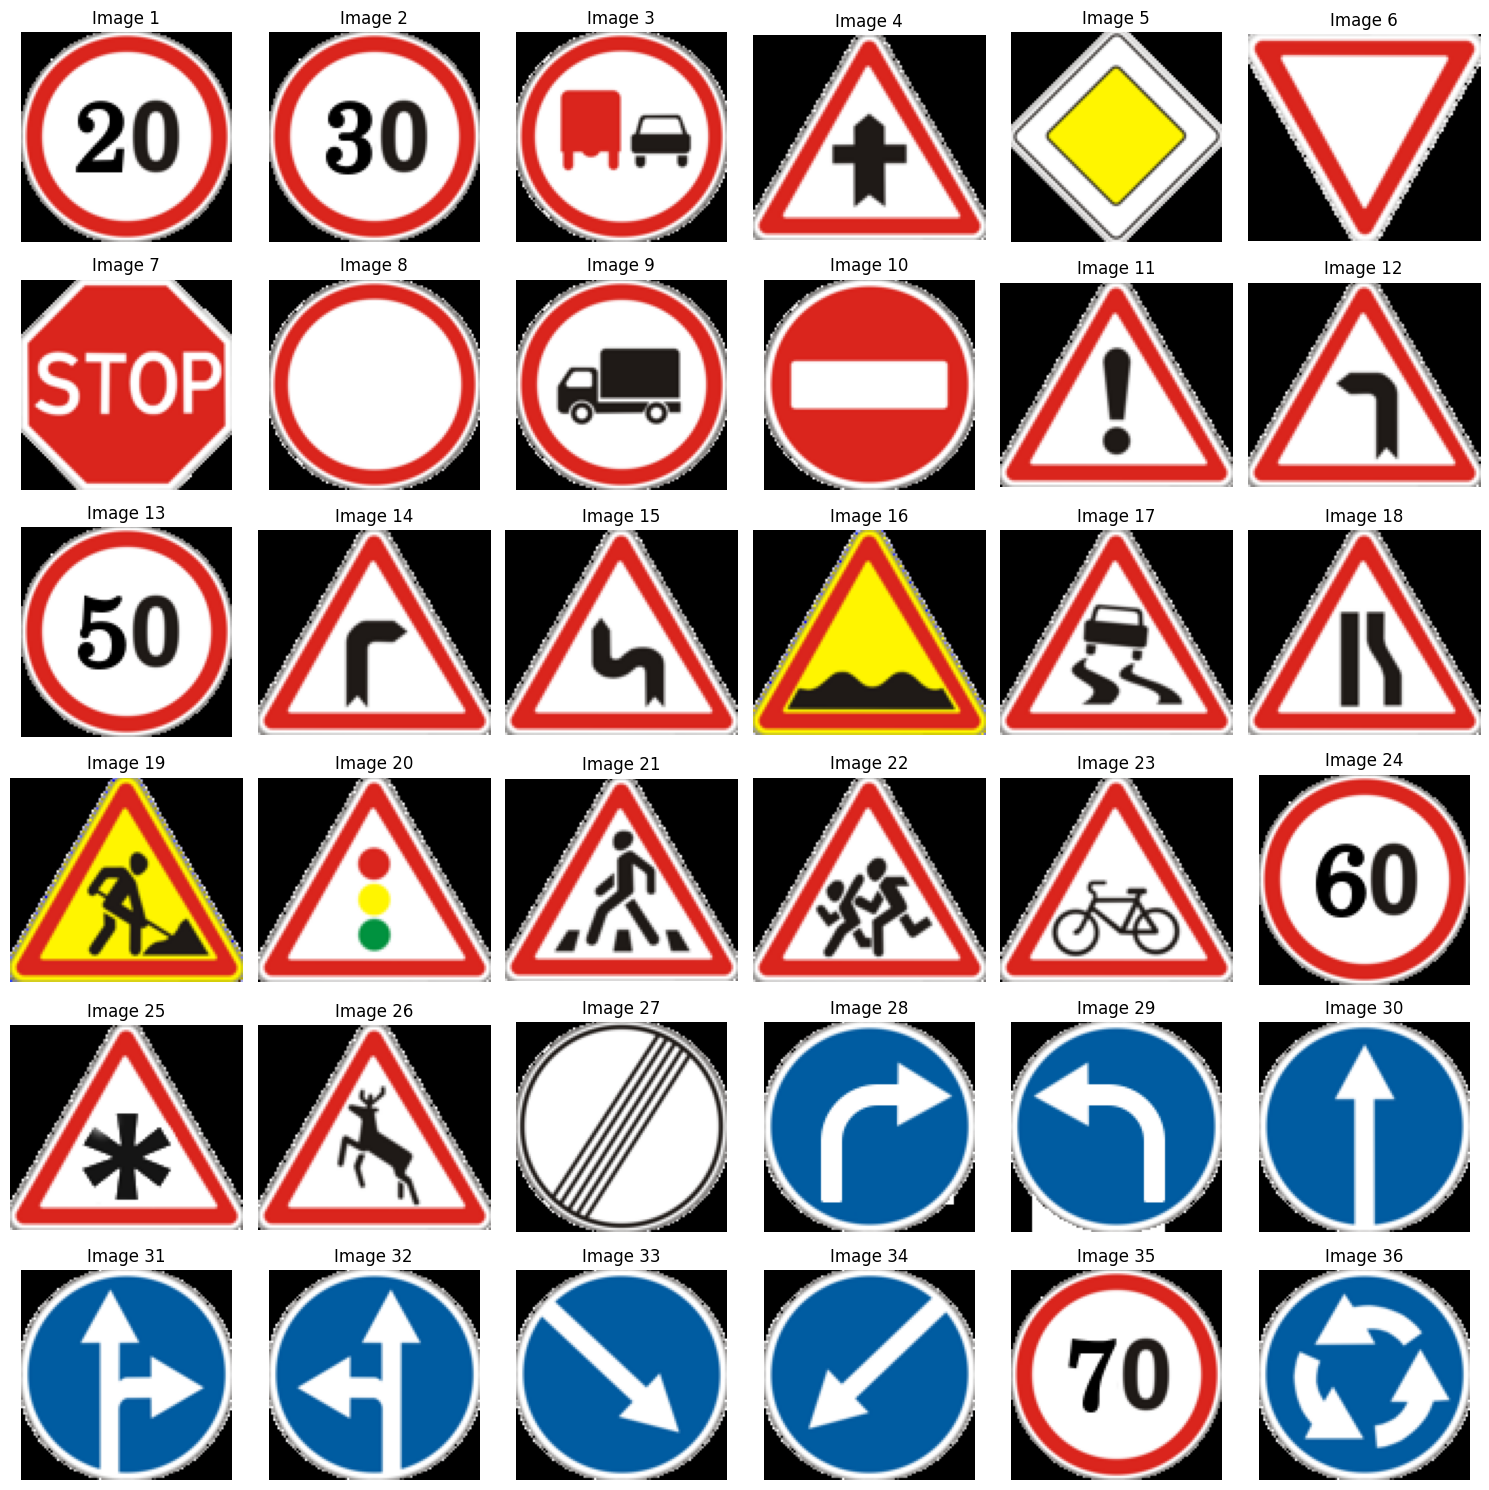

In [3]:
# Directory containing your images
image_dir = "Data/Meta/"

# List all image files in the directory
image_files = [
    f for f in os.listdir(image_dir) if f.endswith((".png", ".jpg", ".jpeg"))
]

# Set up the grid size (e.g., 6 rows x 6 columns for 36 images)
rows = 6
cols = 6
fig, axes = plt.subplots(rows, cols, figsize=(15, 15))

# Iterate over images and display them
for i, file in enumerate(image_files):
    if i >= rows * cols:  # Stop if more images than grid spaces
        break
    img_path = os.path.join(image_dir, file)
    img = load_img(img_path)  # Load image
    ax = axes[i // cols, i % cols]  # Determine grid position
    ax.imshow(img)
    ax.axis("off")  # Hide axes for cleaner display
    ax.set_title(f"Image {i+1}")  # Optional: add titles

# Adjust layout and show plot
plt.tight_layout()
plt.show()

## Loading the Train and Test Csv files


In [4]:
train_csv = pd.read_csv(
    r"E:\AIE_Expert_Internship\traffic_sign_detection\Data\Train.csv"
)
test_csv = pd.read_csv(r"E:\AIE_Expert_Internship\traffic_sign_detection\Data\Test.csv")

In [5]:
# first 5 rows of the dataset
train_csv.head()

,Width,Height,Roi.X1,Roi.Y1,Roi.X2,Roi.Y2,ClassId,Path
0,27,26,5,5,22,20,20,Train\20\00020_00000_00000.png
1,28,27,5,6,23,22,20,Train\20\00020_00000_00001.png
2,29,26,6,5,24,21,20,Train\20\00020_00000_00002.png
3,28,27,5,6,23,22,20,Train\20\00020_00000_00003.png
4,28,26,5,5,23,21,20,Train\20\00020_00000_00004.png


In [6]:
# Checking the path of the test image
test_csv["Path"]

0        Test\00000.png
1        Test\00001.png
2        Test\00002.png
3        Test\00003.png
4        Test\00004.png
              ...      
12625    Test\12625.png
12626    Test\12626.png
12627    Test\12627.png
12628    Test\12628.png
12629    Test\12629.png
Name: Path, Length: 12630, dtype: object

In [7]:
import glob
import os

# Specify the directory containing the images
directory_path = r"E:\AIE_Expert_Internship\traffic_sign_detection\Data"

# Use glob to list all files in the directory
img_paths = [a for a in glob.glob(os.path.join(directory_path, "*"))]

# Print the paths
print(img_paths)

['E:\\AIE_Expert_Internship\\traffic_sign_detection\\Data\\Meta', 'E:\\AIE_Expert_Internship\\traffic_sign_detection\\Data\\Meta.csv', 'E:\\AIE_Expert_Internship\\traffic_sign_detection\\Data\\Test', 'E:\\AIE_Expert_Internship\\traffic_sign_detection\\Data\\Test.csv', 'E:\\AIE_Expert_Internship\\traffic_sign_detection\\Data\\Train', 'E:\\AIE_Expert_Internship\\traffic_sign_detection\\Data\\Train.csv']


In [8]:
classes = {
    0: "Speed limit (20km/h)",
    1: "Speed limit (30km/h)",
    2: "Speed limit (50km/h)",
    3: "Speed limit (60km/h)",
    4: "Speed limit (70km/h)",
    5: "Speed limit (80km/h)",
    6: "End of Speed limit (80km/h)",
    7: "Speed limit (100km/h)",
    8: "Speed limit (120km/h)",
    9: "No passing",
    10: "No passing veh over 3.5 tons",
    11: "Right-of-way at intersection",
    12: "Priority road",
    13: "Yield",
    14: "Stop",
    15: "No vehicles",
    16: "Veh > 3.5 tons prohibited",
    17: "No entry",
    18: "General caution",
    19: "Dangerous curve left",
    20: "Dangerous curve right",
    21: "Double curve",
    22: "Bumpy road",
    23: "Slippery road",
    24: "Road narrows on the right",
    25: "Road work",
    26: "Traffic signals",
    27: "Pedestrians",
    28: "Children crossing",
    29: "Bicycle crossing",
    30: "Beware of ice/snow",
    31: "Wild animals crossing",
    32: "End speed + passing limits",
    33: "Turn right ahead",
    34: "Turn left ahead",
    35: "Ahead only",
    36: "Go straight or right",
    37: "Go straight or left",
    38: "Keep right",
    39: "Keep Left",
    40: "Roundabout mandatory",
    41: "End of no passing",
    42: "End of no passing veh > 3.5 tons",
}

## Display the traffic sign for each classes of the dataset


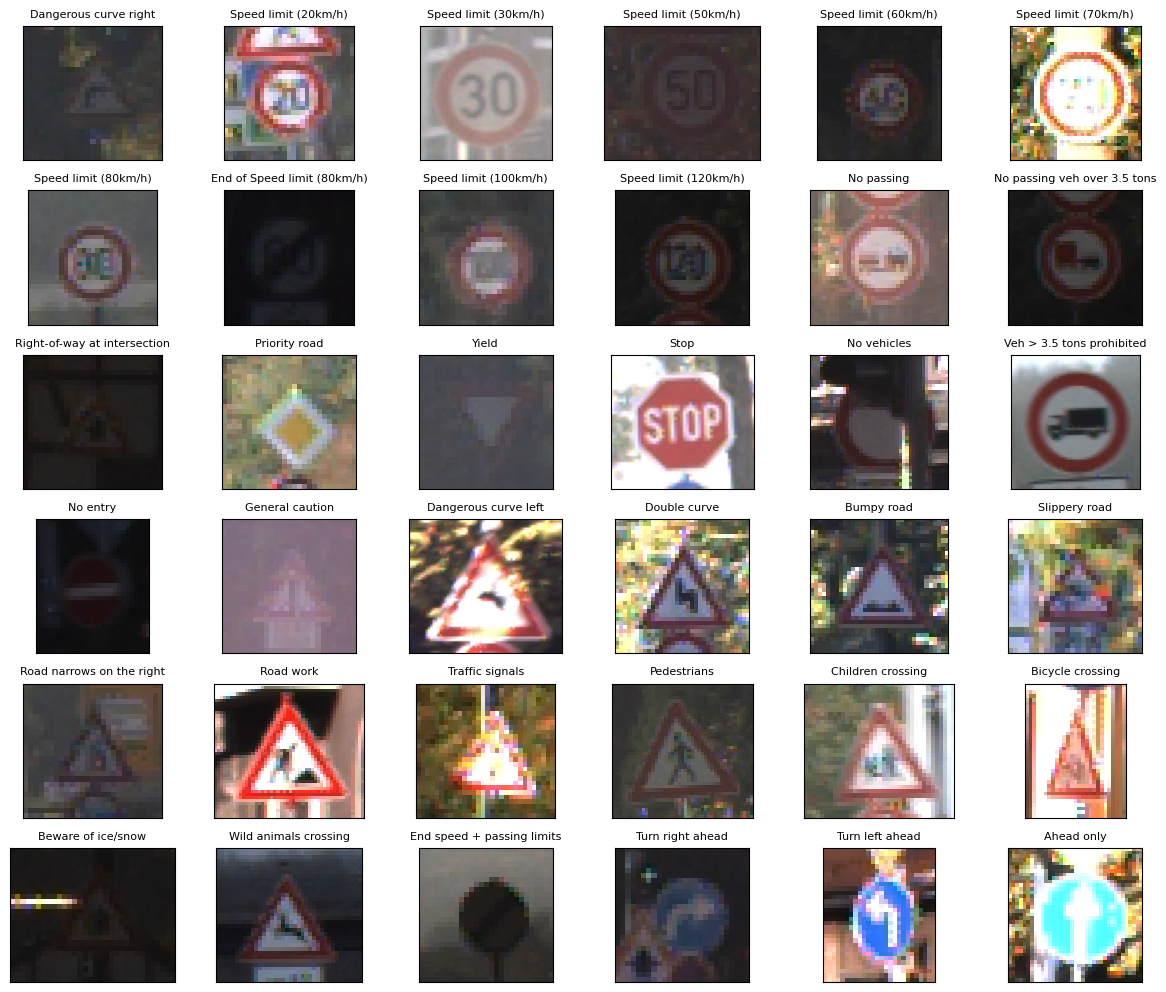

In [9]:
import matplotlib.pyplot as plt

# Set the base path for the images
path = r"E:\AIE_Expert_Internship\traffic_sign_detection\Data" + "\\"

# Create a DataFrame with unique ClassId values
df_unique = train_csv.copy().drop_duplicates(subset=["ClassId"]).reset_index()

# Create a 6x6 grid of subplots
fig, axes = plt.subplots(
    nrows=6, ncols=6, figsize=(12, 10), subplot_kw={"xticks": [], "yticks": []}
)

# Loop over each axis and display the images
for i, ax in enumerate(axes.flat):
    if i < len(df_unique):  # Ensure we don't go out of bounds
        # Read and display each image
        img_path = path + str(df_unique.Path[i])
        ax.imshow(plt.imread(img_path))

        # Get the class label from the dictionary
        class_id = df_unique.ClassId[i]
        class_label = classes.get(
            class_id, "Unknown"
        )  # Default to 'Unknown' if not in dictionary

        # Set the title to the class label of the image
        ax.set_title(class_label, fontsize=8)
    else:
        # Hide unused subplots
        ax.axis("off")

# Adjust the layout for better spacing between the images
plt.tight_layout(pad=1.0)
plt.show()

## Add path of the images that contain the both training and testing data


In [10]:
training_images_path = list(
    "E:\\AIE_Expert_Internship\\traffic_sign_detection\\Data\\" + train_csv["Path"]
)
testing_images_path = list(
    "E:\\AIE_Expert_Internship\\traffic_sign_detection\\Data\\" + test_csv["Path"]
)

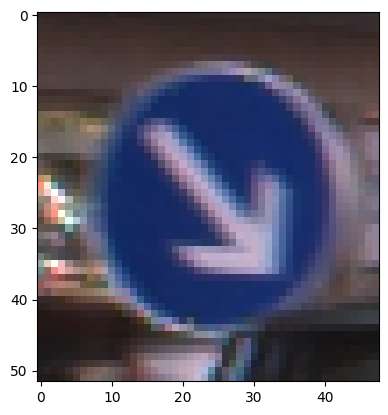

In [11]:
# Assuming 'testing_images_path' is a list of image paths and the desired image is the third one.
image = plt.imread(testing_images_path[2])

# Display the image
plt.imshow(image)

# Add command to show the image explicitly
plt.show()

In [12]:
# all unique classes available in the data
train_csv["ClassId"].unique()

array([20,  0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15,
       16, 17, 18, 19, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42], dtype=int64)

In [13]:
## path of the train csv file
train_csv["Path"]

0        Train\20\00020_00000_00000.png
1        Train\20\00020_00000_00001.png
2        Train\20\00020_00000_00002.png
3        Train\20\00020_00000_00003.png
4        Train\20\00020_00000_00004.png
                      ...              
39204    Train\42\00042_00007_00025.png
39205    Train\42\00042_00007_00026.png
39206    Train\42\00042_00007_00027.png
39207    Train\42\00042_00007_00028.png
39208    Train\42\00042_00007_00029.png
Name: Path, Length: 39209, dtype: object

## Training and Testing labels


In [24]:
# Extract 'ClassId' column to create training and testing labels
training_labels = list(train_csv["ClassId"])
testing_labels = list(test_csv["ClassId"])

# Check the lengths of the training labels
print("Number of Training Labels:", len(training_labels))

# Check the uniqueness of the training labels
unique_classes = pd.unique(training_labels)

# Display the total number of classes and the number of training examples
print("Total Classes =", len(unique_classes))
print("Total Training Examples =", len(training_images_path))

Number of Training Labels: 39209
Total Classes = 43
Total Training Examples = 39209


C:\Users\tamil\AppData\Local\Temp\ipykernel_11152\2325627126.py:9: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  unique_classes = pd.unique(training_labels)


## Adding path and labels to train and test data


In [25]:
train_df = pd.DataFrame(data={"Path": training_images_path, "Labels": training_labels})
train_df = train_df.sample(frac=1).reset_index(drop=True)

In [26]:
train_df.head()

,Path,Labels
0,E:\AIE_Expert_Internship\traffic_sign_detectio...,35
1,E:\AIE_Expert_Internship\traffic_sign_detectio...,11
2,E:\AIE_Expert_Internship\traffic_sign_detectio...,39
3,E:\AIE_Expert_Internship\traffic_sign_detectio...,35
4,E:\AIE_Expert_Internship\traffic_sign_detectio...,8


In [27]:
train_df["Path"][1]

'E:\\AIE_Expert_Internship\\traffic_sign_detection\\Data\\Train\\11\\00011_00012_00023.png'

In [28]:
train_df["Path"][0]

'E:\\AIE_Expert_Internship\\traffic_sign_detection\\Data\\Train\\35\\00035_00039_00008.png'

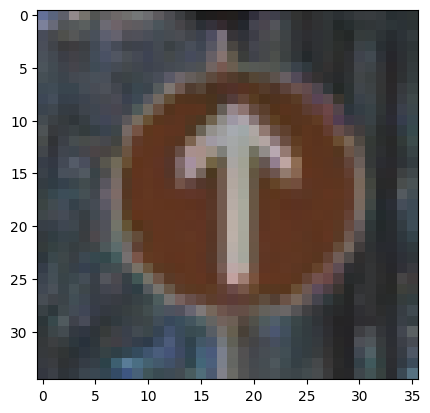

In [29]:
plt.imshow(cv2.imread(train_df["Path"][0]))

In [30]:
train_df["Path"][1]

'E:\\AIE_Expert_Internship\\traffic_sign_detection\\Data\\Train\\11\\00011_00012_00023.png'

AxesImage(shape=(94, 100, 3))
Right-of-way at intersection


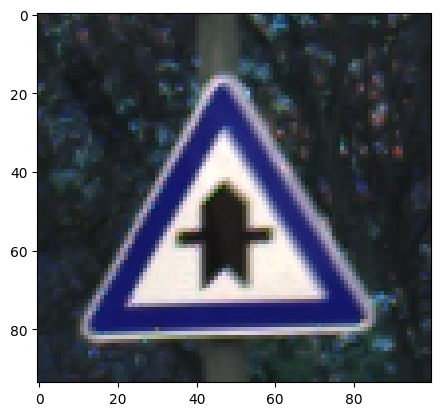

In [33]:
print(plt.imshow(cv2.imread(train_df["Path"][1])))
print(classes[(train_df["Labels"][1])])

In [38]:
# Create a DataFrame for testing data
test_df = pd.DataFrame(data={"Path": testing_images_path, "Labels": testing_labels})

# Shuffle the DataFrame and reset the index
test_df = test_df.sample(frac=1).reset_index(drop=True)

# Display the first few rows of the shuffled DataFrame
test_df.head()

,Path,Labels
0,E:\AIE_Expert_Internship\traffic_sign_detectio...,34
1,E:\AIE_Expert_Internship\traffic_sign_detectio...,31
2,E:\AIE_Expert_Internship\traffic_sign_detectio...,31
3,E:\AIE_Expert_Internship\traffic_sign_detectio...,35
4,E:\AIE_Expert_Internship\traffic_sign_detectio...,5


## Generate the random images with numbers


Randomly selected indices: [277 238 123 155 138  42 147  72 202 328 274 100 149 383 272 379 162 255
 111  67 219  83 337 208 235]


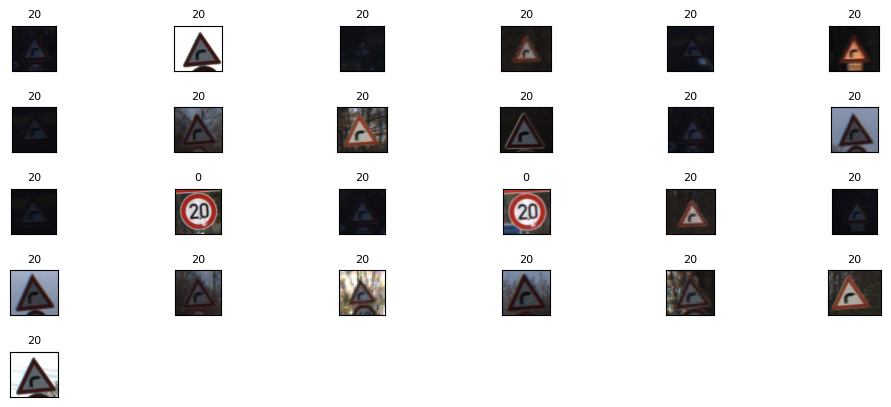

In [40]:
# Generate 25 random numbers within the range [1, 400)
rand_num = np.random.randint(1, 400, size=25)

# Print the random numbers
print("Randomly selected indices:", rand_num)

# Set up the figure for displaying the images
plt.figure(figsize=(12, 8))

for num in range(len(rand_num)):
    plt.subplot(8, 6, num + 1)

    # Read and display the image
    img = cv2.imread(training_images_path[rand_num[num]])
    img = cv2.cvtColor(
        img, cv2.COLOR_BGR2RGB
    )  # Convert BGR to RGB for proper visualization
    plt.imshow(img)

    # Set title and remove axes
    plt.title(training_labels[rand_num[num]], fontsize=8)
    plt.xticks([])
    plt.yticks([])

# Adjust spacing between subplots
plt.subplots_adjust(wspace=0.5, hspace=0.8)

# Show the plot
plt.show()

## Since the pictures were too small and it was also in large quantity hence we havnt used data augmentation


In [41]:
training_data = []
for num in range(len(train_df)):
    img = cv2.imread(train_df["Path"][num])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.equalizeHist(img.astype("uint8"))

    img = img / 255.00
    img = cv2.resize(img, (33, 33), interpolation=cv2.INTER_NEAREST)
    training_data.append(img)

training_data = np.array(training_data)

In [43]:
training_data.shape

(39209, 33, 33)

In [44]:
testing_data = []
# print(training_images_path)
for num in range(len(test_df)):
    # print(num)
    img = cv2.imread(test_df["Path"][num])
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    img = cv2.equalizeHist(img.astype("uint8"))

    img = img / 255.00
    img = cv2.resize(img, (33, 33), interpolation=cv2.INTER_NEAREST)
    testing_data.append(img)

testing_data = np.array(testing_data)

In [45]:
testing_data.shape

(12630, 33, 33)

In [1]:
# Adding a channel dimension to the images of the training data
training_data = training_data.reshape(
    training_data.shape[0], training_data.shape[1], training_data.shape[2], 1
)

NameError: name 'training_data' is not defined

In [47]:
training_data.shape

(39209, 33, 33, 1)

In [48]:
# Adding a channel dimension to the images of the testing data
testing_data = testing_data.reshape(
    testing_data.shape[0], testing_data.shape[1], testing_data.shape[2], 1
)

In [49]:
testing_data.shape

(12630, 33, 33, 1)

DATA AUGMENTATION


In [50]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [51]:
datagen = ImageDataGenerator(
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.2,
    shear_range=0.1,
    rotation_range=10,
    horizontal_flip=False,
)

In [52]:
datagen.fit(training_data)

In [53]:
y_train = to_categorical(train_df.Labels)  # Changing into categorical variable
y_test = to_categorical(test_df.Labels)  # changing into categorical variable

In [66]:
len(y_train), len(y_test)

(39209, 12630)

In [67]:
batch = datagen.flow(training_data, y_train, batch_size=20)

In [68]:
train_batch, train_label_batch = next(batch)

4


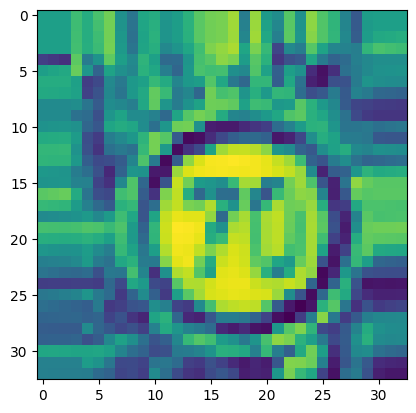

In [69]:
plt.imshow(train_batch[6].reshape(33, 33))
print(np.argmax(train_label_batch[6]))

## Model Building


In [70]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout
from tensorflow.keras.callbacks import EarlyStopping

# EarlyStopping callback to stop training if the validation accuracy doesn't improve
stop = EarlyStopping(monitor="val_accuracy", patience=4, restore_best_weights=True)

# Initialize the model
model = Sequential()

# First convolutional layer with max pooling and dropout
model.add(
    Conv2D(filters=32, kernel_size=(5, 5), activation="relu", input_shape=(33, 33, 1))
)
model.add(Conv2D(filters=32, kernel_size=(3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))  # MaxPooling layer
model.add(Dropout(rate=0.25))  # Dropout layer for regularization

# Second convolutional layer with max pooling and dropout
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation="relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))  # MaxPooling layer
model.add(Dropout(rate=0.25))  # Dropout layer for regularization

# Flatten the output for the fully connected layer
model.add(Flatten())

# Fully connected layer with 256 units and ReLU activation
model.add(Dense(256, activation="relu"))
model.add(Dropout(rate=0.5))  # Dropout for regularization

# Output layer with softmax for classification (43 classes for traffic signs)
model.add(Dense(43, activation="softmax"))

# Compile the model
model.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

c:\Users\tamil\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [71]:
history = model.fit(
    datagen.flow(
        training_data, y_train, batch_size=32
    ),  # Generator for data augmentation
    validation_data=(testing_data, y_test),  # Validation data
    epochs=15,  # Number of epochs
    verbose=1,  # Progress display
    callbacks=[stop],  # Early stopping or other callbacks
)

Epoch 1/15


c:\Users\tamil\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1226/1226 ━━━━━━━━━━━━━━━━━━━━ 20s 15ms/step - accuracy: 0.2870 - loss: 2.5976 - val_accuracy: 0.8437 - val_loss: 0.5138
Epoch 2/15
1226/1226 ━━━━━━━━━━━━━━━━━━━━ 19s 15ms/step - accuracy: 0.7207 - loss: 0.8841 - val_accuracy: 0.9360 - val_loss: 0.2431
Epoch 3/15
1226/1226 ━━━━━━━━━━━━━━━━━━━━ 19s 16ms/step - accuracy: 0.8151 - loss: 0.5816 - val_accuracy: 0.9370 - val_loss: 0.2151
Epoch 4/15
1226/1226 ━━━━━━━━━━━━━━━━━━━━ 19s 15ms/step - accuracy: 0.8538 - loss: 0.4630 - val_accuracy: 0.9612 - val_loss: 0.1387
Epoch 5/15
1226/1226 ━━━━━━━━━━━━━━━━━━━━ 19s 16ms/step - accuracy: 0.8786 - loss: 0.3855 - val_accuracy: 0.9686 - val_loss: 0.1198
Epoch 6/15
1226/1226 ━━━━━━━━━━━━━━━━━━━━ 19s 16ms/step - accuracy: 0.8880 - loss: 0.3472 - val_accuracy: 0.9691 - val_loss: 0.1120
Epoch 7/15
1226/1226 ━━━━━━━━━━━━━━━━━━━━ 22s 18ms/step - accuracy: 0.8982 - loss: 0.3205 - val_accuracy: 0.9741 - val_loss: 0.1014
Epoch 8/15
1226/1226 ━━━━━━━━━━━━━━━━━━━━ 26s 21ms/step - accuracy: 0.9083 - loss: 0.29

In [72]:
# predictions of testing data
pred = model.predict(testing_data)

395/395 ━━━━━━━━━━━━━━━━━━━━ 2s 5ms/step


In [73]:
result = np.argmax(pred, axis=1)

print(result)

[34 31 31 ... 11 25 35]


In [74]:
len(result)

12630

In [75]:
## Checking accuracy score
from sklearn.metrics import accuracy_score


accuracy_score(test_df.Labels, result)

0.9798099762470309

In [76]:
model.save("model_traffic_data.keras")

## Plotting the result and graphs


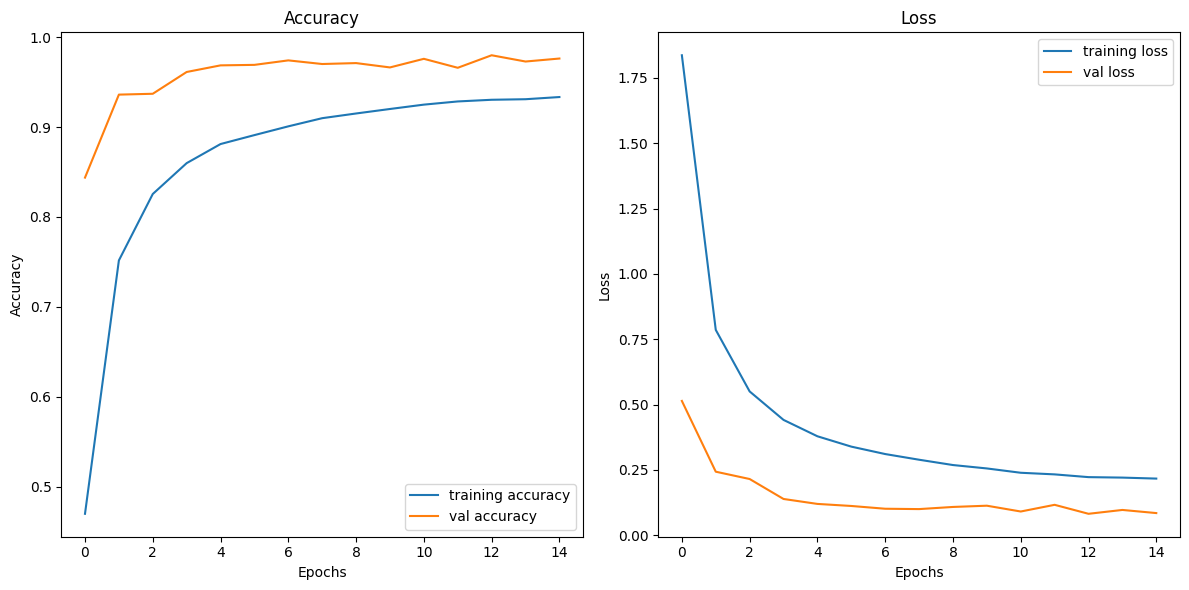

In [78]:
import matplotlib.pyplot as plt

# Create a figure with 1 row and 2 columns for subplots
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plotting Accuracy on the first subplot (axes[0])
axes[0].plot(history.history["accuracy"], label="training accuracy")
axes[0].plot(history.history["val_accuracy"], label="val accuracy")
axes[0].set_title("Accuracy")
axes[0].set_xlabel("Epochs")
axes[0].set_ylabel("Accuracy")
axes[0].legend()

# Plotting Loss on the second subplot (axes[1])
axes[1].plot(history.history["loss"], label="training loss")
axes[1].plot(history.history["val_loss"], label="val loss")
axes[1].set_title("Loss")
axes[1].set_xlabel("Epochs")
axes[1].set_ylabel("Loss")
axes[1].legend()

# Adjust the layout to prevent overlap
plt.tight_layout()

# Save the plot as a PNG file
plt.savefig("accuracy_loss_plot.png")

# Display the plots
plt.show()